
<h1>Time-Series Machine-Learning Analysis of Brain Neuronal Activity</h1>

<h2> Neuron Fire </h2>

<h3>
    A neuron spikes when a combination of all the excitation and inhibition it receives makes it reach threshold
</h3>

<figure>
  <img src="Figures/Neuron_Voltage_Threshold.png"/>
  <figcaption>(Image: Alan Woodruff / QBI)</figcaption>
</figure>

<hr>

<h2> 
    Modeling a Set of Neurons
</h2>


<img src="Figures/Set_of_Neurons.png"/>

<div style="font-size: 18px;">
$
V_{i}(t+\delta t) = \sum_{j} T_{ij} \cdot V_{j}(t) + V_{i}^{\text{ext.}}
$
</div>
  
<hr>

<h2>Experiment Design</h2>
<img src="Figures/Experiment_Design.png">
<hr>

## Config Cell

In [1]:
############################
## injection time in seconds
############################
t_half = 2000. 


#######################
## experiment condition
#######################
## b: before injection 
## a: after injection
exp = "a"

#######################
## Intensity threshold 
## for noise removal
#######################
y_min = 5.

## Import python packages

In [2]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

## Make a directory (folder) to hold our data spreadsheet

In [3]:
%%bash 
mkdir -p Data

## Make two directories (folders) to store the output files 

In [4]:
if os.path.exists("Output/Figures") == False:
  os.makedirs("Output/Figures")

if os.path.exists("Output/Pickles") == False:
  os.makedirs("Output/Pickles")

## Import & Read Data

In [5]:
################
## read the data
################
df = pd.read_csv(f"Data/Final_denoised_cell_traces.csv")

In [6]:
df.head()

,t,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50
0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000
1,0.099961,0.000000e+00,0.000000e+00,2.781024,1.377164,0.000000,1.820420,0.224495,7.625068,2.594516,0.0,3.703795,0.000000,1.158415,0.642853,0.477061,6.068878,7.508608,0.0,5.795537,8.331210,4.027442,0.291694,2.218157,1.666774,0.000000,0.0,3.491885,2.013359,0.000000e+00,0.000000,7.699002,0.000000e+00,0.000000e+00,1.162795,4.832001,0.000000e+00,0.000000,0.000000e+00,1.022068,5.605923,1.470751,0.000000e+00,0.0,0.000000,3.544732,0.000000,0.000000e+00,0.825051,0.000000,0.0,0.751783
2,0.199922,0.000000e+00,0.000000e+00,2.577415,1.289834,2.193143,3.385832,0.200980,8.539282,5.231391,0.0,3.483472,0.000000,1.083357,1.486605,1.212568,10.874440,12.211230,0.0,5.909008,7.732234,3.655318,0.267231,2.029055,1.504274,1.558859,0.0,5.583532,1.847384,0.000000e+00,0.000000,7.485610,0.000000e+00,0.000000e+00,1.083907,4.502895,-4.768372e-07,0.000000,-4.768372e-07,2.364618,8.809490,6.820532,0.000000e+00,0.0,0.695687,3.275371,1.941747,0.000000e+00,0.740534,1.411308,0.0,0.661065
3,0.299883,-4.768372e-07,0.000000e+00,2.388714,1.208042,2.028561,3.822640,0.179928,10.347520,4.980871,0.0,3.276255,2.071510,1.013162,1.383292,1.471995,15.523960,11.426860,0.0,5.459388,7.176323,4.350039,0.244820,1.856073,1.357617,3.213049,0.0,6.776128,1.695093,0.000000e+00,0.000000,7.042376,0.000000e+00,-4.768372e-07,1.010372,4.196207,0.000000e+00,0.349169,1.784620e-01,2.245093,10.065010,6.503761,-9.536743e-07,0.0,1.271612,3.026479,1.789192,4.768372e-07,0.664676,2.723876,0.0,1.446731
4,0.399844,-4.768372e-07,1.490116e-08,3.193609,1.131436,3.536679,3.515312,0.361948,9.420374,5.190987,0.0,3.081365,1.958689,3.752641,3.300190,3.493771,14.243610,10.692880,0.0,5.043979,6.660379,6.389438,0.224288,1.697839,1.225259,2.989119,0.0,6.465967,3.277371,1.192093e-07,0.551547,6.625386,-5.960464e-08,-4.768372e-07,0.941825,3.910408,0.000000e+00,0.323142,9.473109e-01,2.131609,10.031450,6.201700,7.265081e-01,0.0,2.790373,2.796499,1.648623,4.768372e-07,1.444237,2.463924,0.0,2.145297


## Missing Values?

In [7]:
## drop the nan values 
mask_nan = df.isna().any(axis=1)

print(f"number of missing values: {sum(mask_nan)}")

number of missing values: 0


## Handle missing values if exist

In [8]:
## do something with missing values

## Columns of the spreadsheet

In [9]:
cols = list(df.columns)
print(f"First 5 columns: {cols[:5]}")

First 5 columns: ['t', ' C00', ' C01', ' C02', ' C03']


## Plot a histogram of neuron activities

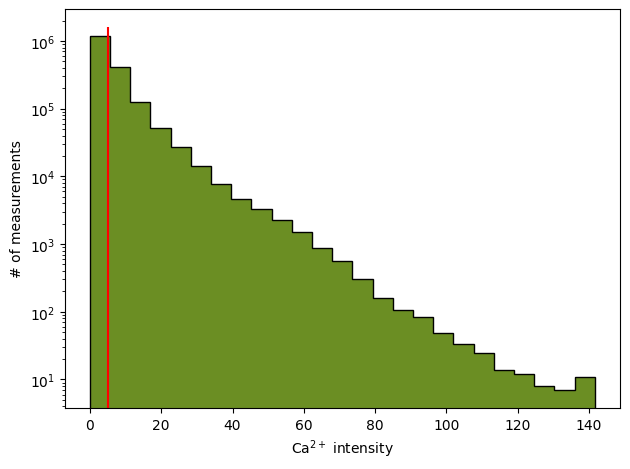

In [10]:
## plot intensites
fig, ax = plt.subplots()
ax.hist(np.array(df[cols[1:]]).flatten(), bins=25, color='olivedrab')
ax.hist(np.array(df[cols[1:]]).flatten(), histtype='step', bins=25,color='k')
ax.set_xlabel(r"Ca$^{2+}$ intensity")
ax.set_ylabel("# of measurements")
ax.vlines(5,0,1.6e6, color='r')
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set_yscale("log")
plt.tight_layout()
plt.show()

## Remove noise

### First define a function to be applied to every neuron value in the spreadsheet 

* if intensity is below the threshold, set it to zero
* otherwise, preserve the value

In [11]:
## noise removal function
def RemNoise(x, cut=y_min):
  if x < cut:
    return 0 
  else:
    return x

### Apply the noise removal function to every cell of the neuron intensity in the spreadsheet

In [12]:
## apply the noise removal function 
for col in cols[1:]:
  df[col] = df[col].apply(RemNoise)

### Let's checkout the new look of the spreadsheet

In [13]:
df.head()

,t,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.099961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.625068,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,6.068878,7.508608,0.0,5.795537,8.331210,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,7.699002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.605923,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.199922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.539282,5.231391,0.0,0.0,0.0,0.0,0.0,0.0,10.874440,12.211230,0.0,5.909008,7.732234,0.000000,0.0,0.0,0.0,0.0,0.0,5.583532,0.0,0.0,0.0,7.485610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.809490,6.820532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.299883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.347520,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,15.523960,11.426860,0.0,5.459388,7.176323,0.000000,0.0,0.0,0.0,0.0,0.0,6.776128,0.0,0.0,0.0,7.042376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.065010,6.503761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.399844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.420374,5.190987,0.0,0.0,0.0,0.0,0.0,0.0,14.243610,10.692880,0.0,5.043979,6.660379,6.389438,0.0,0.0,0.0,0.0,0.0,6.465967,0.0,0.0,0.0,6.625386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.031450,6.201700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## We analyze one experimental condition at a time. 
### Split spreadsheet to either before the injection of after the injection

In [14]:
if exp == "a":
  df = df[df['t']>t_half]
elif exp == "b":
  df = df[df['t']<t_half]
else:
  raise(Exception("input should be a or b."))

## 

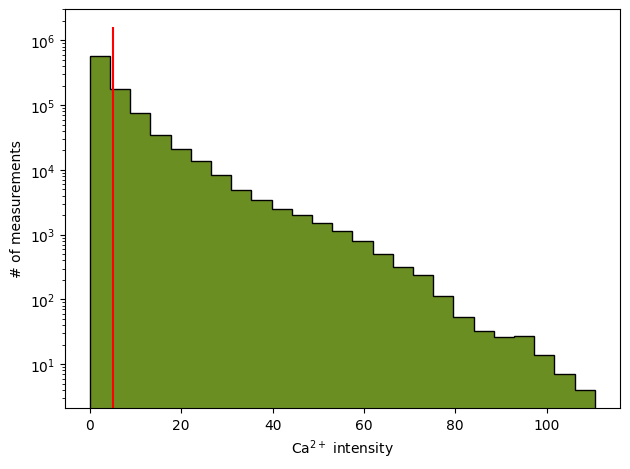

In [15]:
## plot intensites
fig, ax = plt.subplots()
ax.hist(np.array(df[cols[1:]]).flatten(), bins=25, color='olivedrab')
ax.hist(np.array(df[cols[1:]]).flatten(), histtype='step', bins=25,color='k')
ax.set_xlabel(r"Ca$^{2+}$ intensity")
ax.set_ylabel("# of measurements")
ax.vlines(5,0,1.6e6, color='r')
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set_yscale("log")
plt.tight_layout()
##plt.show()
if exp == "a":
  fileName = f"Output/Figures/Distribution_Observed_intensity_After.png"
elif exp == "b":
  fileName = f"Output/Figures/Distribution_Observed_intensity_Before.png"
fig.savefig(fileName,dpi=200)

## Plot neuron activity, calcium intensity, change over time

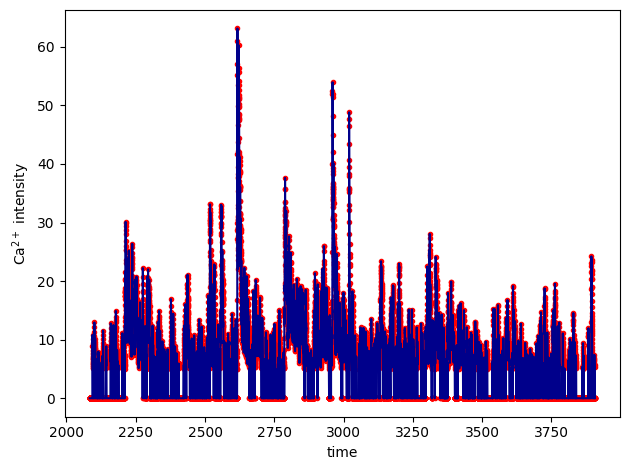

In [16]:
fig, ax = plt.subplots()
ax.scatter(df[cols[0]], df[cols[1]],marker='.',c='r')
ax.plot(df[cols[0]], df[cols[1]],color='darkblue')
ax.set_xlabel(r"time (s)")
ax.set_xlabel(r"time")
ax.set_ylabel(r"Ca$^{2+}$ intensity")
plt.tight_layout()
##plt.show()
if exp == "a":
  fileName = f"Output/Figures/Intensity_time_After.png"
elif exp == "b":
  fileName = f"Output/Figures/Intensity_time_Before.png"
fig.savefig(fileName,dpi=200)

## Store the number of neurons in a variable

In [17]:
Nf = len(cols[1:])
print(f"number of features (neurons): {Nf}")

number of features (neurons): 51


## Define a few containers to store our computed values

In [18]:
## Neuron i to neuron j connection 
Tij       = np.zeros((Nf, Nf))

## external voltage to neuron i. It can be from other neurons not in the set or from an actual external device
Ci        = np.zeros(Nf)

## mean squared error for the train the test sets
MSE_train = np.zeros(Nf)
MSE_test  = np.zeros(Nf)
Err_train = []
Err_test  = []

## Let's see how the connectivity matrix look before the computations

In [19]:
Tij

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Convert the spreadsheet to a time-series machine-learning (ML) dataset

### ML convention:
* X: feature variables (the predictors) 
* y: target variables

### Mappint the convetion to our model
* X: neuron intensities at time t 
* y: intensity of neuron i at time t + 1

<img src="Figures/X_y.png"/>

In [20]:
## return X, y for a specific neuron 
def GetData(label,y_min):
  X = np.array(df[cols[1:]])[0:-1,:] ## states at t
  y =  np.array(df[label])[1:]       ## states at t+1
  
  ## drop the noise. Any T is a solution when X=y=0
  X[y < y_min] = 0
  y[y < y_min] = 0
  
  return X, y

## Perform the ML fitting to find the connectivity matrix

### Steps:
* For every neuron
    * construct 
        X: the spreadsheet excluding the last row
        y: column i of the spreadsheet excluding the first row
    * shuffle the rows such that corresponding X, y rows are preserved
    * Split to 75% for training and 25% for testing, i.e. keep blind
    * perform a linear regression to fit this 
        * $y = \text{coef} * X + $ intercept
    * set the fitted coefficient (coef) as the ith row of the connectivity matrix
    * set the fitted intercept as the external voltage to neuron i
    * plot actual and predicted intencities of one of the neurons for both test and train data
    * store the errors
    

References: 
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a>

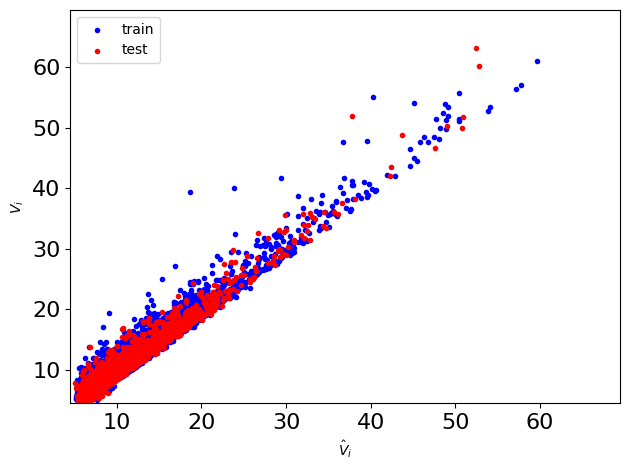

In [21]:
##########################################
## loop over all neurons
## for each neuron perform one ML analysis
##########################################
for ilabel, label in enumerate(cols[1:]):
  
  ## construct the X, y from the spreadsheet. 
  ## X: all the neurons at time t
  ## y: neuron i at time t+1
  X, y = GetData(label,y_min)

  
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=np.random.RandomState(0))

## linear regression
  reg = LinearRegression().fit(X_train, y_train)

  ## set the interactions
  Tij[ilabel,:] = reg.coef_
  Ci[ilabel] = reg.intercept_

## plot the regression
  if ilabel==0:
    fig, ax = plt.subplots()
    ax.scatter(reg.predict(X_train),y_train,marker='.',color='b',alpha=1,label='train')
    ax.scatter(reg.predict(X_test),y_test,marker='.',color='r',alpha=1,label='test')
    ax.set_xlabel(r'$\hat{V}_i$')
    ax.set_ylabel(r'$V_i$')
    ax.set_xlim(0.9*y_min,1.1*y.max())
    ax.set_ylim(0.9*y_min,1.1*y.max())
    ax.tick_params(labelsize=16) 
    ax.legend()
    plt.tight_layout()
    ###plt.show()
    if exp == "a":
      filename = "Output/Figures/%s_ClassicHopfieldFit_After.png"%(label.replace(" ",""))
    elif exp == "b":
      filename = "Output/Figures/%s_ClassicHopfieldFit_Before.png"%(label.replace(" ",""))
    fig.savefig(filename,dpi=200)
    

  
  MSE_train[ilabel] = mean_squared_error(y_train, reg.predict(X_train))
  MSE_test[ilabel]  = mean_squared_error(y_test, reg.predict(X_test))
  mask = y_train>0
  Err_train += list(abs(y_train - reg.predict(X_train))[mask]/y_train[mask])
  mask = y_test>0
  Err_test  += list(abs(y_test - reg.predict(X_test))[mask]/y_test[mask])


## See the connectivity matrix after the computions (the fit)

In [22]:
Tij

array([[ 0.88798395, -0.00188306,  0.0102086 , ...,  0.00757944,
         0.01715088,  0.00347959],
       [-0.00547385,  0.9547687 ,  0.00317626, ...,  0.01719841,
        -0.01588095,  0.00887524],
       [ 0.0257692 ,  0.10136112,  0.89534562, ...,  0.06613585,
         0.0130149 , -0.03717968],
       ...,
       [ 0.00937703,  0.03346491,  0.02519983, ...,  0.82910358,
         0.01280388, -0.00287985],
       [ 0.03916014,  0.05950575, -0.00394198, ...,  0.02774612,
         0.53323547,  0.00861318],
       [ 0.01757805,  0.03011126,  0.00677077, ...,  0.00293181,
        -0.0361283 ,  0.78083644]])

## Plot the error in prediction of the test set (the part we kept blind)

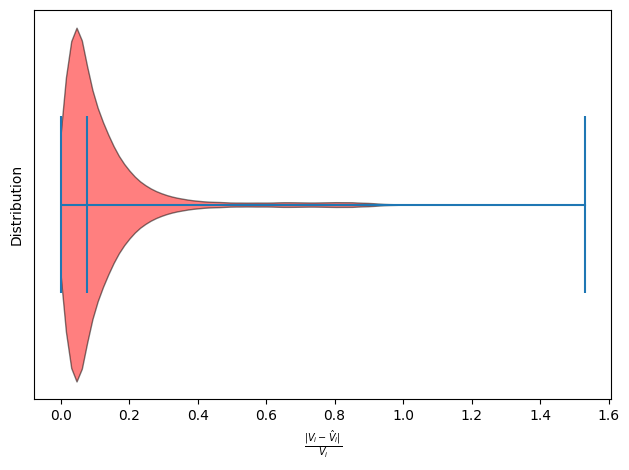

In [23]:
fig, ax = plt.subplots()
violin_parts = ax.violinplot(Err_test, vert=False, showmedians=True)
for vp in violin_parts['bodies']:
    vp.set_facecolor('r')
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.5)
ax.set_ylabel("Distribution") 
ax.set_xlabel(r"$\frac{| V_i - \hat{V}_i |}{V_i}$")
ax.set_yticks([])
plt.tight_layout()
##plt.show()
if exp == "a":
  fileName = f"Output/Figures/ErrorDistribution_After.png"
elif exp == "b":
  fileName = f"Output/Figures/ErrorDistribution_Before.png"
fig.savefig(fileName,dpi=200)

## Store the outputs for further analysis

In [24]:
import pickle
if exp == "a":
  fileName = f"Output/Pickles/X_T_AfterInj.pickle"
elif exp == "b":
  fileName = f"Output/Pickles/X_T_BeforeInj.pickle"
with open(fileName,"wb") as fi:
  pickle.dump([X, Ci, Tij], fi)

## Subtract the diagonal part of the matrix, the self interactions

In [25]:
Tij_nonDiag = Tij - np.diag(np.diag(Tij))
Tij = Tij_nonDiag

## Plot the connectivity matrix

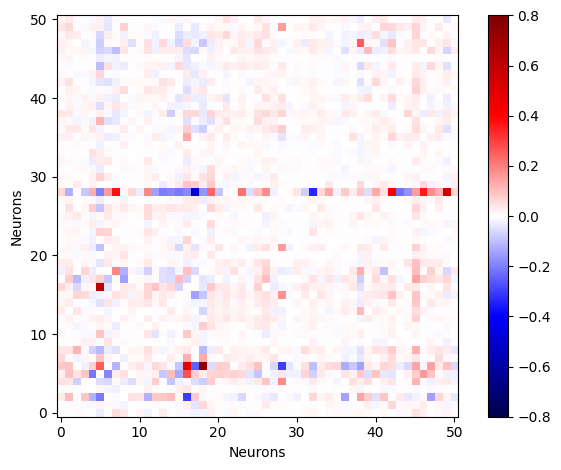

In [26]:
fig, ax = plt.subplots()
im = ax.imshow(Tij,cmap=cm.seismic,vmin=-0.8,vmax=0.8)
##ax.set_title("T before injection")
ax.invert_yaxis()
fig.colorbar(im)
ax.set_xlabel("Neurons")
ax.set_ylabel("Neurons")
plt.tight_layout()
#plt.show()
fig.savefig(f"Output/Figures/T_{exp}.png",dpi=200)
